In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:

drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [2]:
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa
192,Zimbabwe,64,18,4,4.7,Africa


In [3]:
drinks.drop('continent',axis = 1).head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [6]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [7]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [10]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [12]:
drinks.rename(columns={
    'total_litres_of_pure_alcohol':'litres_of_alcohol'
},inplace = True)
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'litres_of_alcohol', 'continent'],
      dtype='object')

In [13]:
drinks.columns = [col.lower() for col in drinks]
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'litres_of_alcohol', 'continent'],
      dtype='object')

In [17]:
drinks.isnull().sum()

country              0
beer_servings        0
spirit_servings      0
wine_servings        0
litres_of_alcohol    0
continent            0
dtype: int64

In [18]:
drinks.shape

(193, 6)

In [19]:
drinks.corr()

,beer_servings,spirit_servings,wine_servings,litres_of_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
litres_of_alcohol,0.835839,0.654968,0.667598,1.000000


In [20]:
subset = drinks[['beer_servings','spirit_servings']]
subset.head()

,beer_servings,spirit_servings
0,0,0
1,89,132
2,25,0
3,245,138
4,217,57


In [22]:
drinks[(drinks['country']=='Zambia')].head()

,country,beer_servings,spirit_servings,wine_servings,litres_of_alcohol,continent
191,Zambia,32,19,4,2.5,Africa


In [23]:
drinks[(drinks['continent']=='Africa')].head()

,country,beer_servings,spirit_servings,wine_servings,litres_of_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
18,Benin,34,4,13,1.1,Africa
22,Botswana,173,35,35,5.4,Africa
26,Burkina Faso,25,7,7,4.3,Africa


In [24]:
drinks[(drinks['litres_of_alcohol']>=5)].head()

,country,beer_servings,spirit_servings,wine_servings,litres_of_alcohol,continent
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
6,Argentina,193,25,221,8.3,South America
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [28]:
def litresFunction(x):
    if x>=5.0:
        return "drunkered"
    else:
        return "sober"

In [29]:
drinks["Alcoholism"]=drinks["litres_of_alcohol"].apply(litresFunction)

In [30]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,litres_of_alcohol,continent,Alcoholism
0,Afghanistan,0,0,0,0.0,Asia,sober
1,Albania,89,132,54,4.9,Europe,sober
2,Algeria,25,0,14,0.7,Africa,sober
3,Andorra,245,138,312,12.4,Europe,drunkered
4,Angola,217,57,45,5.9,Africa,drunkered


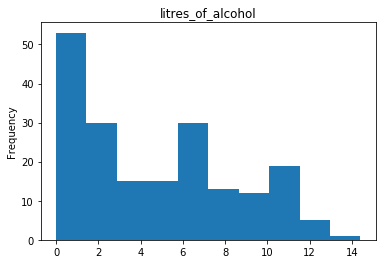

In [38]:
drinks['litres_of_alcohol'].plot(kind = 'hist',title='litres_of_alcohol')